In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString
import seaborn as sns

In [11]:
df_coll = pd.read_csv('data/Collisions.csv')

In [4]:
df_coll.head(1)

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.351713,47.559415,1,308268,309548,E871216,Matched,Intersection,33048.0,SW EDMUNDS ST AND WEST MARGINAL WAY SW,...,Dry,Dusk,NaN,NaN,NaN,10,Entering at angle,0,0,N


In [6]:
df_coll.columns

Index(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [7]:
df_coll.WEATHER.unique()

array(['Clear or Partly Cloudy', 'Raining', nan, 'Overcast', 'Unknown',
       'Severe Crosswind', 'Fog/Smog/Smoke',
       'Blowing Sand or Dirt or Snow', 'Other', 'Snowing',
       'Sleet/Hail/Freezing Rain'], dtype=object)

In [9]:
df_coll.count()

X                  199906
Y                  199906
OBJECTID           207160
INCKEY             207160
COLDETKEY          207160
REPORTNO           207160
STATUS             207160
ADDRTYPE           203548
INTKEY              66842
LOCATION           202732
EXCEPTRSNCODE       86756
EXCEPTRSNDESC       10542
SEVERITYCODE       207159
SEVERITYDESC       207160
COLLISIONTYPE      183002
PERSONCOUNT        207160
PEDCOUNT           207160
PEDCYLCOUNT        207160
VEHCOUNT           207160
INJURIES           207160
SERIOUSINJURIES    207160
FATALITIES         207160
INCDATE            207160
INCDTTM            207160
JUNCTIONTYPE       196053
SDOT_COLCODE       207159
SDOT_COLDESC       207159
INATTENTIONIND      28277
UNDERINFL          183023
WEATHER            182849
ROADCOND           182906
LIGHTCOND          182757
PEDROWNOTGRNT        4894
SDOTCOLNUM         127205
SPEEDING             9355
ST_COLCODE         197747
ST_COLDESC         183002
SEGLANEKEY         207160
CROSSWALKKEY

In [10]:
df_coll.describe()

,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,199906.000000,199906.000000,207160.00000,207160.000000,207160.000000,66842.000000,207160.000000,207160.000000,207160.000000,207160.000000,207160.000000,207160.000000,207160.000000,207159.000000,1.272050e+05,207160.000000,2.071600e+05
mean,-122.330753,47.620446,103580.50000,132319.575637,132460.420168,37347.016352,2.229306,0.037232,0.026839,1.735905,0.373788,0.015051,0.001646,13.377227,7.971063e+06,270.806908,9.629950e+03
std,0.030070,0.055916,59802.08522,78099.564519,78340.573278,50766.510410,1.481342,0.199195,0.163100,0.824771,0.735511,0.159241,0.044294,7.308191,2.611523e+06,3310.595736,7.168368e+04
min,-122.419091,47.495573,1.00000,1001.000000,1001.000000,23807.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,-122.349311,47.578151,51790.75000,68076.750000,68076.750000,28645.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,6.007029e+06,0.000000,0.000000e+00
50%,-122.330420,47.616393,103580.50000,120055.500000,120055.500000,29966.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,8.033011e+06,0.000000,0.000000e+00
75%,-122.311990,47.664380,155370.25000,190000.250000,190080.250000,33963.000000,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,14.000000,1.018101e+07,0.000000,0.000000e+00
max,-122.238951,47.734142,207160.00000,316022.000000,317522.000000,673974.000000,93.000000,6.000000,2.000000,15.000000,78.000000,41.000000,5.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [32]:
x=list(df_coll.WEATHER.unique())
x.pop(2)

nan

In [19]:
y=list(df_coll.WEATHER.value_counts())

<BarContainer object of 10 artists>

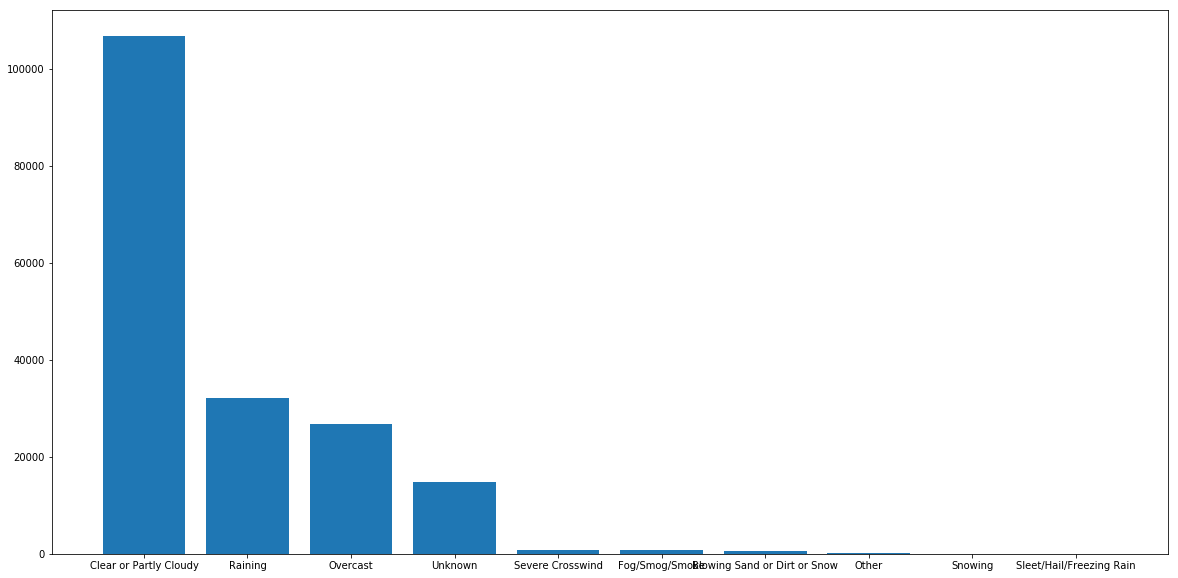

In [33]:
plt.figure(figsize=(20,10))
plt.bar(x, y)

In [41]:
x=list(df_coll.FATALITIES.unique())
x.pop(0)

0

In [42]:
y=list(df_coll.FATALITIES.value_counts())
y.pop(0)

206841

Text(0.5, 1.0, 'Fatalities per accident (out of 200,000 accidents)')

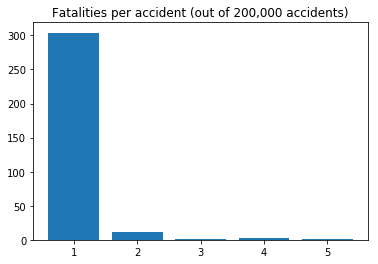

In [49]:
# plt.figure()
plt.bar(x, y)
plt.title('Fatalities in one accident (out of 200,000 accidents)')

In [53]:
x=list(df_coll.UNDERINFL.unique())
df_coll.UNDERINFL.value_counts()


N    92255
0    81692
Y     4845
1     4231
Name: UNDERINFL, dtype: int64

In [ ]:
pd.plotting.scatter_matrix(df_coll, alpha=0.2, figsize=(10, 10));